In [3]:
from fastai.text import *
import pandas as pd
from fastai.callbacks import *

In [4]:
bs = 32

In [5]:
torch.cuda.is_available()

True

In [6]:
path = Path('../data/')

In [7]:
df = pd.read_csv(path/'03_classification_valid_train.csv', error_bad_lines=False, index_col=0)

In [8]:
df['text'] = df['Title'] + ' ' +  df['URL']

In [9]:
df.text = df.text.str.split('.')

In [10]:
df.text = df.text.str.join(' ')

In [25]:
df.text

0                    68 Dean Street http://www sixty8 com/
1        Abandoned Communities http://www abandonedcomm...
2        Alexander Thomson Society http://www greekthom...
3        Arab British Centre, The http://www arabbritis...
4        Architectural Association School of Architectu...
                               ...                        
22885    Critical Approaches to Discourse Analysis Acro...
11177    SALAMI - Shared Aggregation of LAbour Market I...
14513    Camborne, Redruth and Hayle Liberal Democrats ...
2531     She Also Wrote Plays http://www susan croft bt...
24878    Buckingham Canal Society http://www buckingham...
Name: text, Length: 34837, dtype: object

In [26]:
dlm = (TextList.
        from_df(df,path='.',cols=['text'])
        .split_from_df('is_valid')
        .label_for_lm()
        .databunch(bs=bs))

In [27]:
dlm.show_batch()

idx,text
0,xxmaj architecture http : / / www aaschool ac uk / xxbos xxmaj architectural xxmaj humanities xxmaj research xxmaj association ( xxup xxunk ) http : / / www xxunk - architecture org / xxbos xxmaj architecture com - from the xxmaj royal xxmaj institute of xxmaj british xxmaj architects ( xxup riba ) http : / / www architecture com / xxbos xxmaj architecture com : xxmaj royal xxmaj
1,www movablebridges org uk / xxbos xxmaj mudeford xxmaj sandbank xxmaj news http : / / www msbnews co uk / xxbos xxmaj mysterious xxmaj britain http : / / www mysteriousbritain co uk / xxbos xxmaj national xxmaj museums xxmaj liverpool : xxmaj slave xxmaj history xxmaj trail http : / / www liverpoolmuseums org uk / maritime / trail / trail_accessible asp xxbos xxmaj national xxmaj trails http
2,"& abolitionism http : / / www vam ac uk / content / articles / i / images - of - slavery - and - abolitionism / xxbos xxmaj valley of the xxmaj first xxmaj iron xxmaj masters , xxmaj the http : / / www xxunk hull ac uk / xxbos xxmaj xxunk xxmaj iconography http : / / sites google com / site / xxunk / xxbos xxmaj"
3,xxbos xxmaj west xxmaj country xxmaj writers ' xxmaj association http : / / www xxunk com / xxbos xxmaj west xxmaj house xxmaj books http : / / www xxunk co uk / xxbos xxmaj white xxmaj row xxmaj press http : / / www xxunk com / xxbos xxmaj whittington xxmaj press http : / / www whittingtonpress com / xxbos xxmaj wigtown : xxmaj scotland 's national
4,: / / www bbc co uk / news / uk - politics-20600442 xxbos xxup bbc xxmaj news : xxup bnp campaign xxunk bus bomb photo http : / / news bbc co uk / 1 / hi / uk_politics / xxunk stm xxbos xxup bbc xxmaj news : xxmaj baseball pays tribute to xxmaj robinson http : / / news bbc co uk / sport1 / hi / other_sports


In [28]:
learn = language_model_learner(dlm, AWD_LSTM, drop_mult=0.5, pretrained=True).to_fp16()

In [29]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 5.75E-02
Min loss divided by 10: 9.12E-02


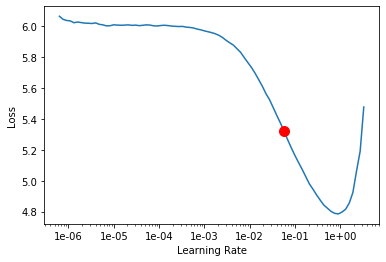

In [30]:
learn.recorder.plot(suggestion=True)

In [31]:
lr = learn.recorder.min_grad_lr

In [32]:
learn.fit_one_cycle(5,max_lr=lr,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.357812,1.821467,0.690524,01:43
1,1.955479,1.416272,0.736092,01:43
2,1.691204,1.159762,0.773893,01:43
3,1.347772,0.928615,0.816430,01:43
4,1.123008,0.874935,0.827641,01:43


In [33]:
learn.save_encoder('ft_encoder')

In [34]:
dlc = (TextList.from_df(df,path='.',cols=['text'])
        .split_from_df('is_valid')
        .label_from_df('Primary Category')
        .databunch(bs=bs))

In [35]:
f2 = FBeta(average='macro')

In [49]:
learn_class = text_classifier_learner(dlc, AWD_LSTM, metrics=[accuracy, f2]).to_fp16()

In [50]:
learn_class.load_encoder('ft_encoder');

In [38]:
learn_class.lr_find()

epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 8.32E-02
Min loss divided by 10: 5.25E-02


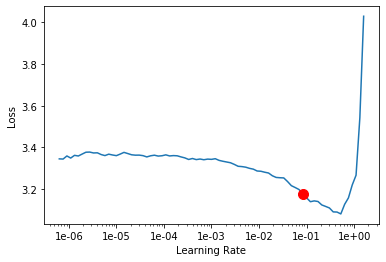

In [39]:
learn_class.recorder.plot(suggestion=True)

In [40]:
lr = learn_class.recorder.min_grad_lr

In [51]:
learn_class.fit_one_cycle(10, max_lr=lr, 
                         callbacks=[SaveModelCallback(learn_class, monitor='f_beta')])

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,2.251552,2.004212,0.319692,0.099127,00:41
1,2.303031,2.016313,0.332131,0.095253,00:41
2,2.364024,2.224573,0.292325,0.061044,00:44
3,2.343049,2.153815,0.277149,0.072008,00:42
4,2.297691,2.145916,0.262719,0.066188,00:44
5,2.244518,1.951876,0.378281,0.104201,00:42
6,2.203833,1.941795,0.387237,0.141173,00:42
7,2.190996,1.907469,0.399179,0.144083,00:41
8,2.120325,1.850111,0.405274,0.153479,00:43
9,2.099134,1.853893,0.409379,0.153879,00:42


Better model found at epoch 0 with f_beta value: 0.09912677854299545.
Better model found at epoch 5 with f_beta value: 0.10420078039169312.
Better model found at epoch 6 with f_beta value: 0.14117303490638733.
Better model found at epoch 7 with f_beta value: 0.14408311247825623.
Better model found at epoch 8 with f_beta value: 0.1534787267446518.
Better model found at epoch 9 with f_beta value: 0.15387873351573944.


In [58]:
learn_class.load('bestmodel');

epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-06
Min loss divided by 10: 1.00E-02


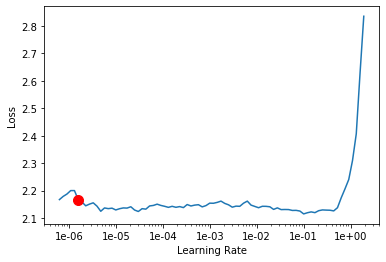

In [59]:
learn_class.lr_find()
learn_class.recorder.plot(suggestion=True)

In [60]:
lr = learn_class.recorder.min_grad_lr

In [61]:
learn_class.fit_one_cycle(10, max_lr=slice(lr,1e-01), 
                         callbacks=[SaveModelCallback(learn_class, monitor='f_beta')])

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,2.191707,1.955415,0.398681,0.162408,00:42
1,2.298042,2.134758,0.312352,0.075048,00:41
2,2.368293,2.259158,0.258117,0.055101,00:44
3,2.356523,2.180588,0.322055,0.088470,00:42
4,2.335055,2.057287,0.370693,0.111006,00:42
5,2.279414,2.055671,0.333126,0.111146,00:41
6,2.277908,1.973057,0.356263,0.117364,00:43
7,2.160704,1.982011,0.381640,0.134399,00:41
8,2.125567,1.858054,0.400672,0.144462,00:42
9,2.118258,1.840110,0.405150,0.149300,00:41


Better model found at epoch 0 with f_beta value: 0.16240771114826202.


In [62]:
learn_class.load('bestmodel');

epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-06
Min loss divided by 10: 2.75E-07


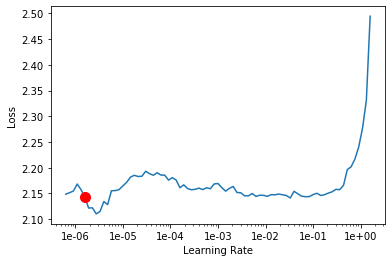

In [63]:
learn_class.lr_find()
learn_class.recorder.plot(suggestion=True)

In [64]:
lr = learn_class.recorder.min_grad_lr

In [65]:
learn_class.fit_one_cycle(2, max_lr=lr, 
                         callbacks=[SaveModelCallback(learn_class, monitor='f_beta')])

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,2.158859,1.880814,0.397935,0.160335,00:44
1,2.126092,1.883634,0.392089,0.159725,00:40


Better model found at epoch 0 with f_beta value: 0.1603352576494217.


In [67]:
learn_class.load('bestmodel');

epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.74E-05
Min loss divided by 10: 3.31E-03


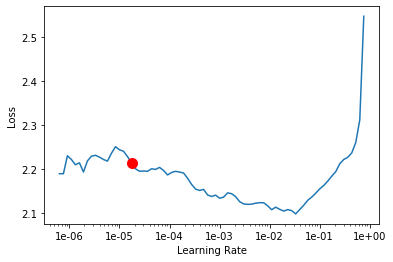

In [68]:
learn_class.unfreeze()
learn_class.lr_find()
learn_class.recorder.plot(suggestion=True)

In [69]:
lr = learn_class.recorder.min_grad_lr

In [70]:
learn_class.fit_one_cycle(10, max_lr=lr, 
                         callbacks=[SaveModelCallback(learn_class, monitor='f_beta')])

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,2.130617,1.867929,0.401169,0.163326,02:22
1,2.117404,1.831087,0.408384,0.167509,02:17
2,2.099294,1.905292,0.418460,0.170339,02:12
3,2.006982,1.768467,0.420948,0.170863,02:16
4,1.995315,1.776231,0.424928,0.171684,02:22
5,1.950948,1.732685,0.428411,0.179475,02:27
6,1.910528,1.733418,0.432890,0.179104,02:22
7,1.926086,1.727219,0.431770,0.177310,02:26
8,1.962377,1.718947,0.436497,0.184577,02:28
9,1.948120,1.719157,0.434880,0.189522,02:12


Better model found at epoch 0 with f_beta value: 0.16332586109638214.
Better model found at epoch 1 with f_beta value: 0.16750900447368622.
Better model found at epoch 2 with f_beta value: 0.1703394502401352.
Better model found at epoch 3 with f_beta value: 0.17086265981197357.
Better model found at epoch 4 with f_beta value: 0.17168432474136353.
Better model found at epoch 5 with f_beta value: 0.17947474122047424.
Better model found at epoch 8 with f_beta value: 0.1845773607492447.
Better model found at epoch 9 with f_beta value: 0.18952222168445587.
